# Анализ данных

Для начала проведем анализ имеющихся данных. В данном исследовании используются данные с января 2016 до августа 2020 года. 

In [33]:
#анализ данных
import pandas as pd

# визуализация 
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# импорт файлов 
import glob

In [3]:
#df = pd.read_csv('data.csv')

In [4]:
columns = pd.read_csv('data/JC-202008-citibike-tripdata.csv').columns

Соединяем файлы за разные года в один. 

In [5]:
path = r'data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, names=columns)
    li.append(df_temp[1:])

df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3209,Brunswick St,40.7241765,-74.0506564,24647,Subscriber,1964,2
1,200,2016-01-01 00:18:22,2016-01-01 00:21:42,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3213,Van Vorst Park,40.71848892,-74.047726625,24605,Subscriber,1962,1
2,202,2016-01-01 00:18:25,2016-01-01 00:21:47,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3213,Van Vorst Park,40.71848892,-74.047726625,24689,Subscriber,1962,2


Данные обезличены. Информация о пользователе содержится лишь в фичах usertype, birth year, gender. 

Значение tripduration указано в минутах.

In [7]:
df.shape

(1521265, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521265 entries, 0 to 1521264
Data columns (total 15 columns):
tripduration               1521265 non-null object
starttime                  1521265 non-null object
stoptime                   1521265 non-null object
start station id           1521265 non-null object
start station name         1521265 non-null object
start station latitude     1521265 non-null object
start station longitude    1521265 non-null object
end station id             1521265 non-null object
end station name           1521265 non-null object
end station latitude       1521265 non-null object
end station longitude      1521265 non-null object
bikeid                     1521265 non-null object
usertype                   1520768 non-null object
birth year                 1482651 non-null object
gender                     1521265 non-null object
dtypes: object(15)
memory usage: 174.1+ MB


С помощью функции info() выявляем, что фича birth year содержит порядка 40 000 значения NULL. 

Добавим новы фичи: дата, день недели, месяц, год когда была совершена поездка (предположим что большинство поездок начались и закончились в один и тот же день). Предположим, что день недели и месяц имеют влияние на продолжительность поездки и их количество. 

In [9]:
df['start_year'] = pd.to_datetime(df['starttime']).dt.year
df['start_month'] = pd.to_datetime(df['starttime']).dt.month
df['start_day'] = pd.to_datetime(df['starttime']).dt.day
df['start_weekday'] = pd.to_datetime(df['starttime']).dt.weekday # 0 - понедельник, 6 - воскресенье

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_year,start_month,start_day,start_weekday
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3209,Brunswick St,40.7241765,-74.0506564,24647,Subscriber,1964,2,2016,1,1,4
1,200,2016-01-01 00:18:22,2016-01-01 00:21:42,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3213,Van Vorst Park,40.71848892,-74.047726625,24605,Subscriber,1962,1,2016,1,1,4
2,202,2016-01-01 00:18:25,2016-01-01 00:21:47,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3213,Van Vorst Park,40.71848892,-74.047726625,24689,Subscriber,1962,2,2016,1,1,4
3,248,2016-01-01 00:23:13,2016-01-01 00:27:21,3209,Brunswick St,40.7241765,-74.0506564,3203,Hamilton Park,40.727595966,-74.044247311,24693,Subscriber,1984,1,2016,1,1,4
4,903,2016-01-01 01:03:20,2016-01-01 01:18:24,3195,Sip Ave,40.73074262530658,-74.06378388404846,3210,Pershing Field,40.742677141,-74.051788633,24573,Customer,NaN,0,2016,1,1,4


In [34]:
df['start_date'] = pd.to_datetime(df['starttime']).dt.date

In [12]:
df['tripduration'] = df['tripduration'].astype(int)

## Анализ продолжительности и количества поездок относительно месяцам и дням недели

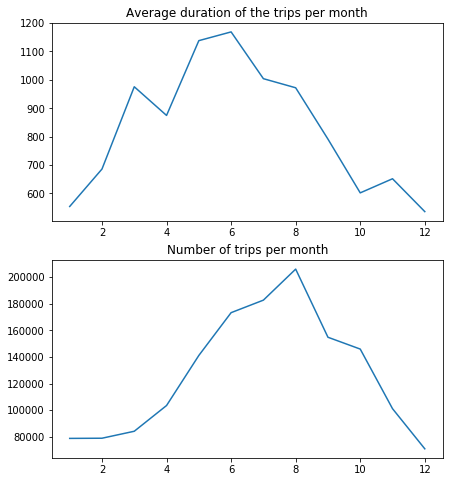

In [13]:
plt.figure(figsize=(7,8))
plt.subplot(211)
plt.title('Average duration of the trips per month')
plt.plot(df.groupby('start_month')['tripduration'].mean())
plt.subplot(212)
plt.title('Number of trips per month')
plt.plot(df.groupby('start_month').size())
plt.show()

Средняя продолжительность поездки по месяцам. В летнее время продолжительность увеличивается в два раза. Пик в июне. 
Количество поездки по месяцам. Количество поездок также увеличивается, но пика достигает в августе, а не в июне. 

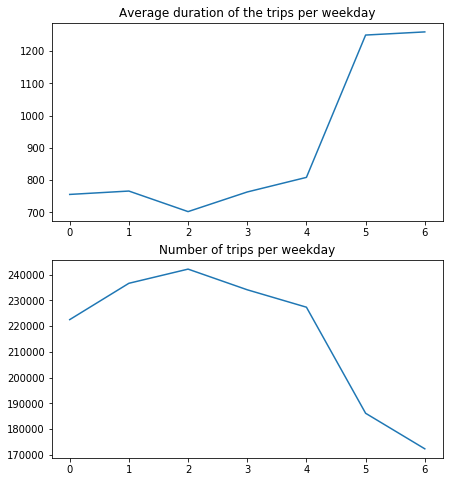

In [14]:
plt.figure(figsize=(7,8))
plt.subplot(211)
plt.title('Average duration of the trips per weekday')
plt.plot(df.groupby('start_weekday')['tripduration'].mean())
plt.subplot(212)
plt.title('Number of trips per weekday')
plt.plot(df.groupby('start_weekday').size())
plt.show()

В выходные количество поездок резко уменьшается, но их продолжительность значительно увеличивается.

## Анализ временного ряда продолжительности поездок и их количества 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration')

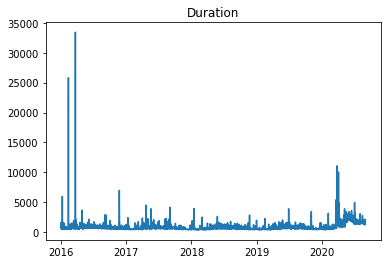

In [15]:
plt.plot(df.groupby('start_date')['tripduration'].mean())
plt.title('Duration')

В 2016 году находятся несколько выбросов. Удалим их.

In [16]:
df = df.drop(df[df['tripduration'] > 10000].index)

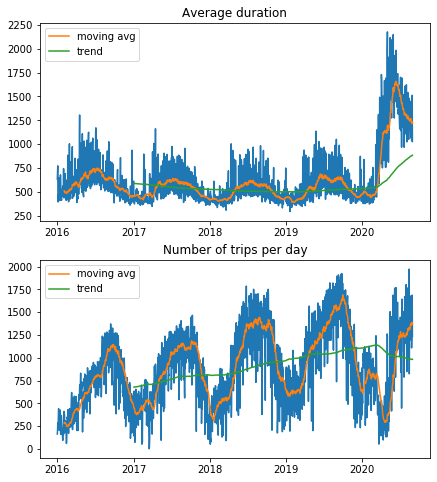

In [17]:
plt.figure(figsize=(7,8))
plt.subplot(211)
plt.plot(df.groupby('start_date')['tripduration'].mean())
plt.plot(df.groupby('start_date')['tripduration'].mean().rolling(30).mean(), label='moving avg')
plt.plot(df.groupby('start_date')['tripduration'].mean().rolling(365).mean(), label='trend')
plt.title('Average duration')
plt.legend()

plt.subplot(212)
plt.plot(df.groupby('start_date').size())
plt.plot(df.groupby('start_date').size().rolling(30).mean(), label='moving avg')
plt.plot(df.groupby('start_date').size().rolling(365).mean(), label='trend')
plt.title('Number of trips per day')
plt.legend()

В обоих графиках просматривается сезонность. В летние месяцы поездок больше и они более продолжительны. Тренд количества поездок - возрастающий. За 4 года среднее значение увеличилось примерно на 250 поездок в день (с 750 до 1000). 
Резкое падение количества поездок в начале 2020 и дальнейшее значительное увеличение продолжительности поездок может быть связано с пандемией короновируса - падение произошло из-за режима самоизоляции, а затем люди начали массово использовать велосипед как замену общественному транспорту. 
 

## Количество велосипедов

Так как количество и продолжительность поездок увеличилась может появиться необходимость в новых велосипедах. Обратим внимание на то, как менялось количество используемых велосипедов за исследуемое время. 

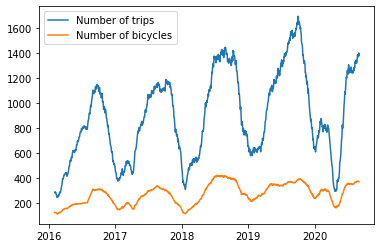

In [36]:
plt.plot(df.groupby('start_date').size().rolling(30).mean(), label='Number of trips')
plt.plot(df.groupby(['start_date'])['bikeid'].nunique().rolling(30).mean(), label='Number of bicycles')
plt.legend()

In [19]:
df.groupby('start_year')['bikeid'].nunique()

start_year
2016     565
2017    1200
2018     903
2019     608
2020    1522
Name: bikeid, dtype: int64

In [20]:
df.groupby(['start_year', 'start_month'])['bikeid'].nunique()

start_year  start_month
2016        1              241
            2              254
            3              303
            4              300
            5              291
            6              291
            7              287
            8              465
            9              456
            10             452
            11             426
            12             345
2017        1              311
            2              398
            3              455
            4              458
            5              477
            6              499
            7              502
            8              517
            9              689
            10             431
            11             310
            12             258
2018        1              221
            2              306
            3              397
            4              553
            5              588
            6              621
            7              608
            8  

Согласно графику и таблицам выше можно отметить, что общее количество велосипедов резко снизилось в 2019 году и приблизилась к первоначальным показателям исследуемого периода в 2016 году. 

Общее число велосипедов не означает их доступность единовременно (велосипеды могли быть заменены на новые в течение года из-за поломки, кражи и других причин). Так, напрмиер, в 2017 году в общей сложности использовалось 1200 уникальных велосипедов, тем не менее количество используемых велосипедов в месяц не превышало 689. Аналогичная ситуация повторилась в 2020 году. 

В целом, можно заметить, что количество используемых велосипедов также имеет сезонность, хотя ни разу не достигло общего числа доступных велосипедов. С одной стороны это показывает, что заданного количества велосипедов достаточно. С другой стороны, нельзя исключать возможности недостатка велосипедов на наиболее популярных станциях и их избыточности на менее востребованных. 

Графики количества велосипедов и количества поездок выглядят пропорционально. На базе этого можно построить предсказание с определением оптимального количества велосипедов в месяц/сезон.

### Коэффицент велосипедов к поездкам

In [26]:
bikes_trips = pd.DataFrame()

ntrips = df.groupby('start_date').size().to_numpy()
nbikes = df.groupby(['start_date'])['bikeid'].nunique().to_numpy()

bikes_trips['date'] = df['start_date'].unique()
bikes_trips['ntrips'] = ntrips
bikes_trips['nbikes'] = nbikes
bikes_trips['coef'] = nbikes/ntrips


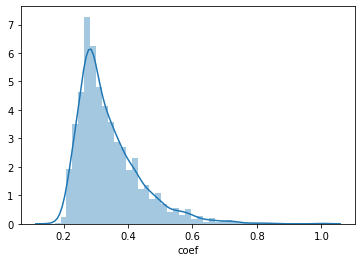

In [28]:
sns.distplot(bikes_trips.coef)

Отношение доступных велосипедов к числу поездок может служить опорой для выбора необходимого числа велосипедов. В сезоны, когда коэффициент велик (то есть количество велосипедов достаточно велико для совершаемых поездок) часть велосипедов может быть  отправлена на ремонт/техосмотр или просто убрана во избежания краж и вандализма.

Низкий коэффициент может свидетельствовать либо о нехватке велосипедов (спрос ограничен предложением), либо о низком спросе. 

### Количество велосипедов по остановкам

In [37]:
def bike_by_station(df, name):
    data = df[df['start station name'] == name]
    plt.plot(data.groupby('start_date').size().rolling(30).mean(), label='Number of trips')
    plt.plot(data.groupby(['start_date'])['bikeid'].nunique().rolling(30).mean(), label='Number of bicycles')
    plt.legend()
    

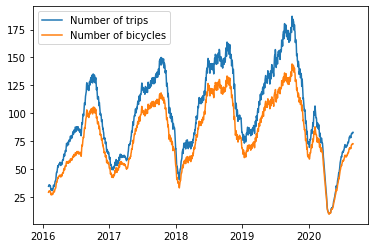

In [38]:
bike_by_station(df, 'Grove St PATH')

# Возраст 

Возраст может иметь важную роль. Гипотеза: продолжительность поездки уменьшается с возрастом. 

In [27]:
#Средний возраст
age = 2020 - df['birth year'].dropna().astype(int)
age.mean()

39.47260663763673

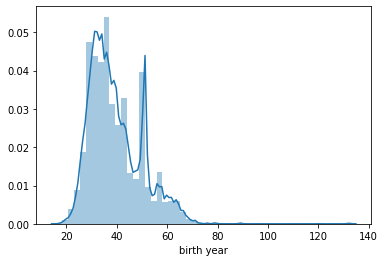

In [25]:
sns.distplot(age)

Распределение имеют 2 основных пика - около 40 лет и около 50. Возможно приложение, которое используют пользователи имеет установленный год по умолчанию. Также в данных присутствуют достаточно больше количество пользователей с возрастом более 110 лет, что маловероятно. Проверим гипотезу о том, что существует зависимость между tripduration и возрастом пользователя. 

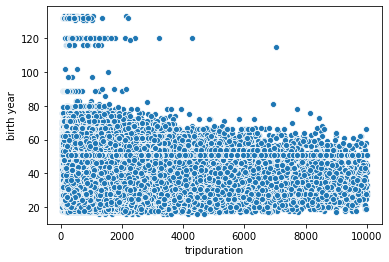

In [26]:
sns.scatterplot(x=df['tripduration'], y=2020 - df['birth year'].dropna().astype(int))

Зависимости не обнаружено. 

Сохраним датафрейм, чтобы не проделывать вышеуказанные манипуляции снова.

# Популярные остановки

In [33]:
def top_stations(df, n, year, month):
    '''''
    Выбор n самых популярных станций за выбранный период 
    
    df - данные для обработки 
    n - желаемое количество остановок
    year - год желаемого периода
    month - месяц желаемого периода
    '''''
    data = df[(df['start_year'] == year) & (df['start_month'] == month)]
    station_count_start = data['start station name'].value_counts()[:n]
    return station_count_start

In [34]:
top_stations(df, 10, 2020, 3)

Grove St PATH                 1334
Hamilton Park                  909
Sip Ave                        884
Harborside                     856
Marin Light Rail               737
Newport PATH                   697
Liberty Light Rail             670
Newport Pkwy                   639
Columbus Dr at Exchange Pl     627
City Hall                      507
Name: start station name, dtype: int64

In [ ]:
df.to_csv('data.csv')

# Заключение


В результате анализа были разработаны следующие метрики: 
1. среднее время поездки (tripduration) / количество поездок по дням
3. продолжительность и количество поездок в зависимости от месяца 
4. продолжительность и количество поездок в зависимости от дня недели 
6. количество используемых велосипедов 